# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os 
from os.path import join, basename, splitext
import pandas as pd

os.getcwd()
os.chdir('/Users/Rachel/Desktop/STA 141B/hw3')

def read_files(folder, forms):
    """
    Return an organized data frame of data.
    Arg:
    foder(string): name of folder where data lies in.
    forms(str): different forms of food, i.e. Fresh.
    """
    files = [join('./assignment3_data',folder,f) for f in os.listdir(join('./assignment3_data', folder)) if '.xlsx' in f]
    list_df = []
    for f in files:
        test = pd.read_excel(f, header = 1, parse_cols = [0,1,3,4,6],skip_footer = 3)
        test.columns = ['form', 'price_per_lb', 'yield', 'lb_per_cup','price_per_cup']
        test = test.drop(0)
        test = test[test.form.str.contains(forms, na = False)]
        test.insert(0, 'food', splitext(basename(f))[0])
        list_df.append(test)
    df = pd.concat(list_df, ignore_index = True)
    df.insert(0, 'type', folder)
    return df

fruit = read_files('fruit', 'Fresh')
fruit.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.567515,0.9,0.2425085,0.4223731
1,fruit,apricots,Fresh1,3.040072,0.93,0.3637627,1.189102
2,fruit,bananas,Fresh1,0.5669834,0.64,0.3306934,0.2929651
3,fruit,blackberries,Fresh1,5.774708,0.96,0.3196703,1.922919
4,fruit,blueberries,Fresh1,4.734622,0.95,0.3196703,1.593177


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [34]:
vege = read_files('vegetables', 'Fresh')
vege[vege.isnull().T.any().T]

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
4,vegetables,broccoli,Fresh,,,,NaN
9,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN
10,vegetables,cauliflower,Fresh1,,,,NaN
11,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
20,vegetables,lettuce_romaine,Fresh1,,NaN,,NaN
21,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
28,vegetables,spinach,Fresh1,NaN,NaN,NaN,NaN
31,vegetables,tomatoes,Fresh,NaN,NaN,NaN,NaN


My code did not extract the correct prices for tomatoes, broccoli, carrots, cauliflower,celery, lettuce_romaine, mushrooms and spinach because the Fresh is a row of merged cells without any numbers, which is quite different from that of other files.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [3]:
df = fruit.append(vege, ignore_index = True)
df = df.dropna()
df = df.convert_objects(convert_numeric = True).reset_index()
df.head()


,index,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
1,1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
2,2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,3,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
4,4,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

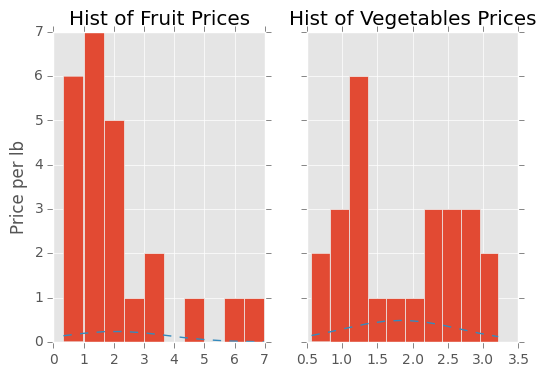

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
matplotlib.style.use('ggplot')

price_fruit = df[df['type']=='fruit'].price_per_lb
mu1 = price_fruit.mean()
sigma1 = price_fruit.std()
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True)
n1, bins1, patches1 = ax1.hist(price_fruit.values)
y1 = mlab.normpdf(bins1, mu1, sigma1)
ax1.plot(bins1, y1, '--')
ax1.set_ylabel('Price per lb')
ax1.set_title('Hist of Fruit Prices')

price_vege = df[df['type']=='vegetables'].price_per_lb
mu2 = price_vege.mean()
sigma2 = price_vege.std()
n2, bins2, patches2 = ax2.hist(price_vege.values, 10)
y2 = mlab.normpdf(bins2, mu2, sigma2)
ax2.plot(bins2, y2, '--')
ax2.set_title('Hist of Vegetables Prices')
plt.show()


Comparing the distributions of prices of fruit and vegetables, we find the prices of fruit are more diverse and asymmetric while those of vegetables are more centered and symmetric.

In [23]:
import numpy as np
p1 = df[df.price_per_lb == df.price_per_lb.max()]['food'].values
p2 = df[df.price_per_lb == df.price_per_lb.min()]['food'].values
print p1[0], p2[0]


raspberries watermelon


In [20]:
value = df['yield'] / df['price_per_lb']
value[value==value.min()]

20    0.137618
dtype: float64

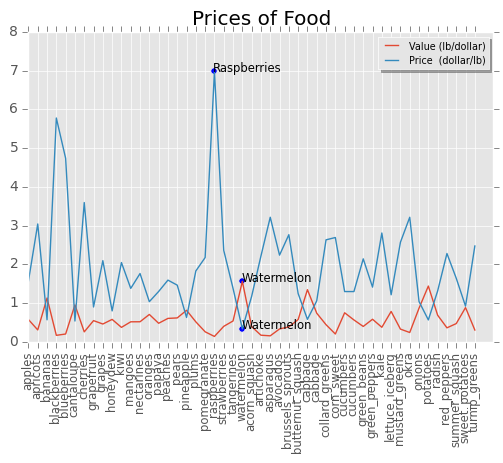

In [24]:
plt.plot(value, label = 'Value (lb/dollar)')
plt.plot(df['price_per_lb'], label = 'Price  (dollar/lb)')
plt.legend(loc = 'upper right', shadow = True, fontsize = 'x-small')
for label,x,y in zip(['Watermelon','Raspberries','Watermelon'], [23,20,23], [value[23], df.price_per_lb[20],df.price_per_lb[23]]):
    plt.scatter(x, y)
    plt.annotate(label, xy = (x,y), fontsize = 'small')
plt.ylim([0,8])
plt.xlim([0,50])
plt.title('Prices of Food')
plt.xticks(range(49), df['food'], rotation = 'vertical', fontsize = 'small')
plt.show()

<strong>Raspberries</strong> are the most expensive and <strong>watermelon</strong> is the least expensive.

After dividing yield by price per pound, we have values of price of every food. These values can be treaed as the the amount of prepared food 1 dollar can buy. In this case, <strong>watermelon</strong> is of best value of price. 

In terms of combination of price, yield and nutrition, I think banana, cantaloupe, pineapple, cabbage and potatoes may be better choices.

If we want to explore the nutrition of food, grains, which are fundamental of our daily diets, are absent in this data set. Hence we may conclude incomplete information.